In [1]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt 
import altair as alt


# Analisis Exploratorio

El objetivo es ...

## Carga de data

In [2]:
path_hechos = os.path.join('..','data','clear','hechos_homicidios.csv')
path_victimas = os.path.join('..','data','clear','victimas_homicidios.csv')

In [3]:
hechos = pd.read_csv(path_hechos)
victimas = pd.read_csv(path_victimas)

In [4]:
hechos.head(5)

,id_hechos,n_victimas,fecha,anho,mes,dia,hora,franja_horaria,lugar_del_hecho,tipo_de_calle,calle,direccion_normalizada,comuna,longitud,latitud,participantes,victimas,acusado,Cruce_boolean
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,True
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,True
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,False
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO-SD,MOTO,SD,True
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,True


In [5]:
victimas.head(5)

,id_hechos,fecha,anho,mes,dia,rol,victimas,sexo,edad,fecha_fallecimiento,misma_fecha_accidente,rango_etario,semestre
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01,True,joven,1
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02,True,adulto_mayor,1
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03,True,adulto,1
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,2016-01-10,True,joven,1
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01,False,joven,1


In [6]:
data = hechos.merge(victimas,on='id_hechos')

data.columns

Index(['id_hechos', 'n_victimas', 'fecha_x', 'anho_x', 'mes_x', 'dia_x',
       'hora', 'franja_horaria', 'lugar_del_hecho', 'tipo_de_calle', 'calle',
       'direccion_normalizada', 'comuna', 'longitud', 'latitud',
       'participantes', 'victimas_x', 'acusado', 'Cruce_boolean', 'fecha_y',
       'anho_y', 'mes_y', 'dia_y', 'rol', 'victimas_y', 'sexo', 'edad',
       'fecha_fallecimiento', 'misma_fecha_accidente', 'rango_etario',
       'semestre'],
      dtype='object')

In [9]:
columnas = ['id_hechos', 'n_victimas', 'fecha_x', 'anho_x', 'mes_x', 'dia_x',
       'hora', 'franja_horaria', 'lugar_del_hecho', 'tipo_de_calle', 'calle',
       'direccion_normalizada', 'comuna', 'longitud', 'latitud',
       'participantes', 'victimas_x', 'acusado', 'Cruce_boolean', 'rol', 'sexo', 'edad',
       'fecha_fallecimiento', 'misma_fecha_accidente', 'rango_etario',
       'semestre']

In [10]:
data = data[columnas]

In [15]:
data['Cruce_boolean'].value_counts()

Cruce_boolean
True     541
False    176
Name: count, dtype: int64

In [18]:
data['tipo_de_calle'].value_counts()

tipo_de_calle
AVENIDA      442
CALLE        138
GRAL PAZ      69
AUTOPISTA     68
Name: count, dtype: int64

In [23]:
data['sexo'].value_counts()

sexo
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64

## Relación de género y tipo de calle

In [22]:
columnas = ['sexo','tipo_de_calle']

data[columnas].groupby(columnas).value_counts()

sexo       tipo_de_calle
FEMENINO   AUTOPISTA          7
           AVENIDA          108
           CALLE             41
           GRAL PAZ          10
MASCULINO  AUTOPISTA         56
           AVENIDA          334
           CALLE             96
           GRAL PAZ          59
SD         AUTOPISTA          5
           CALLE              1
Name: count, dtype: int64

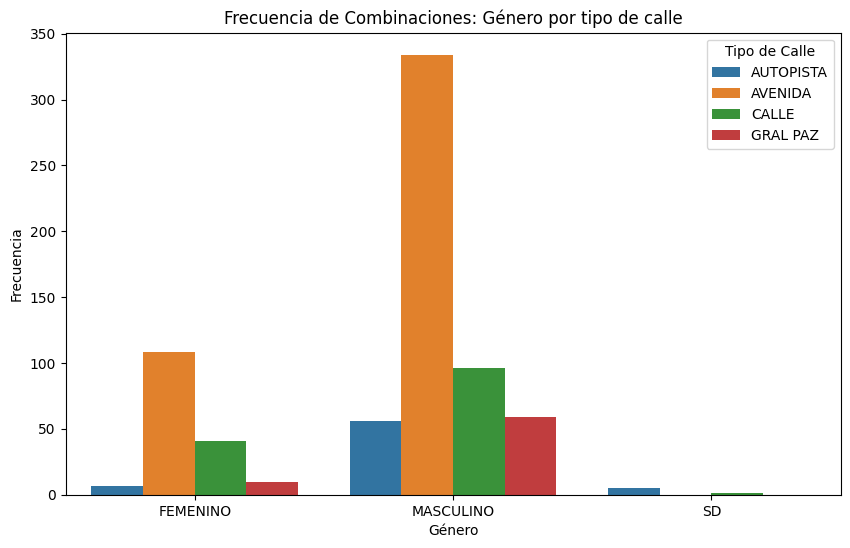

In [26]:

columnas = ['sexo', 'tipo_de_calle']

# Crear el DataFrame con las frecuencias
frecuencias = data[columnas].groupby(columnas).size().reset_index(name='count')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='sexo', y='count', hue='tipo_de_calle', data=frecuencias)

# Personalizar el gráfico
plt.title('Frecuencia de Combinaciones: Género por tipo de calle')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de Calle', loc='upper right')

# Mostrar el gráfico
plt.show()

## Relación entre rango etario y fecha de accidente
Vamos a analizar la distribucion de personas que mueren en el sitio

In [84]:
columnas = ['rango_etario','misma_fecha_accidente']

data[columnas].groupby(columnas).value_counts()

rango_etario  misma_fecha_accidente
adulto        False                     46
              True                     240
adulto_mayor  False                     69
              True                     141
joven         False                     33
              True                     165
menor         False                      2
              True                      21
Name: count, dtype: int64

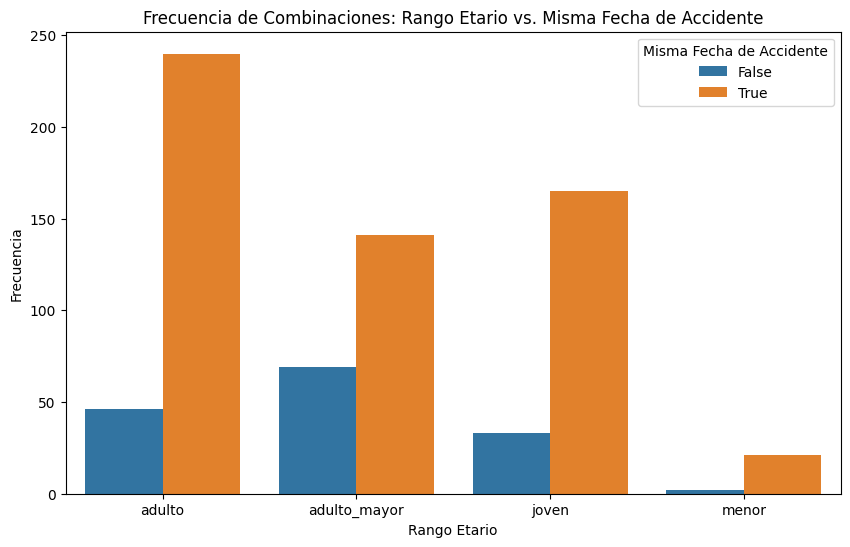

In [90]:

columnas = ['rango_etario', 'misma_fecha_accidente']

# Crear el DataFrame con las frecuencias
frecuencias = data[columnas].groupby(columnas).size().reset_index(name='count')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='rango_etario', y='count', hue='misma_fecha_accidente', data=frecuencias)

# Personalizar el gráfico
plt.title('Frecuencia de Combinaciones: Rango Etario vs. Misma Fecha de Accidente')
plt.xlabel('Rango Etario')
plt.ylabel('Frecuencia')
plt.legend(title='Misma Fecha de Accidente', loc='upper right')

# Mostrar el gráfico
plt.show()

## Cantidad de victimas por mes

In [35]:
data[['n_victimas','mes_x']].groupby('mes_x').sum()

,n_victimas
mes_x,
1,62
2,65
3,68
4,56
5,60
6,58
7,51
8,71
9,59


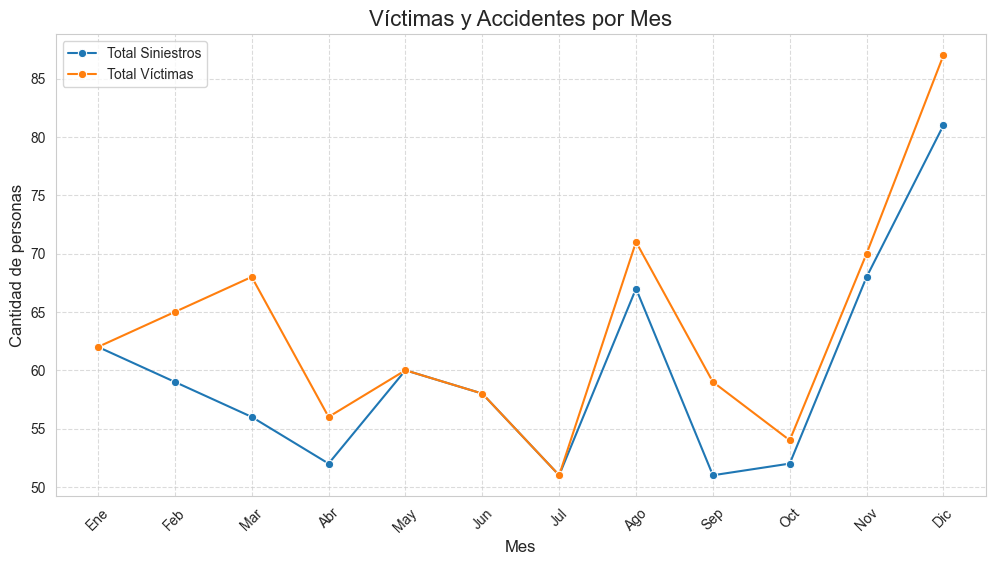

In [50]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid") 


sns.lineplot(data.groupby('mes_x').size() , marker='o', label='Total Siniestros')

sns.lineplot( data[['n_victimas','mes_x']].groupby('mes_x').sum()['n_victimas'], marker='o', label='Total Víctimas')

# Personalizar el gráfico
plt.title('Víctimas y Accidentes por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de personas', fontsize=12)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)

# Agregar leyenda y cuadrícula
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


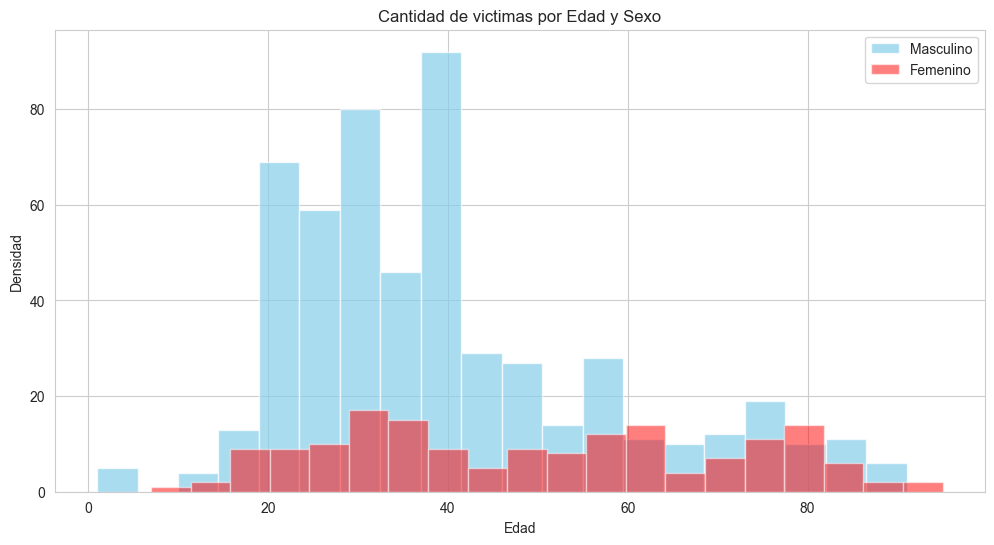

In [70]:
# Crear el histograma
mask_masculino = data['sexo']=='MASCULINO'
mask_femenino = data['sexo']=='FEMENINO'


plt.figure(figsize=(12, 6))
plt.hist(x='edad', data = data[mask_masculino],bins=20, alpha=0.7, color='skyblue', label='Masculino')
plt.hist(x='edad', data = data[mask_femenino],bins=20, alpha=0.5, color='red', label='Femenino')
#plt.hist(femenino, bins=20, alpha=0.5, color='red', label='Femenino', density=True)
plt.title('Cantidad de victimas por Edad y Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

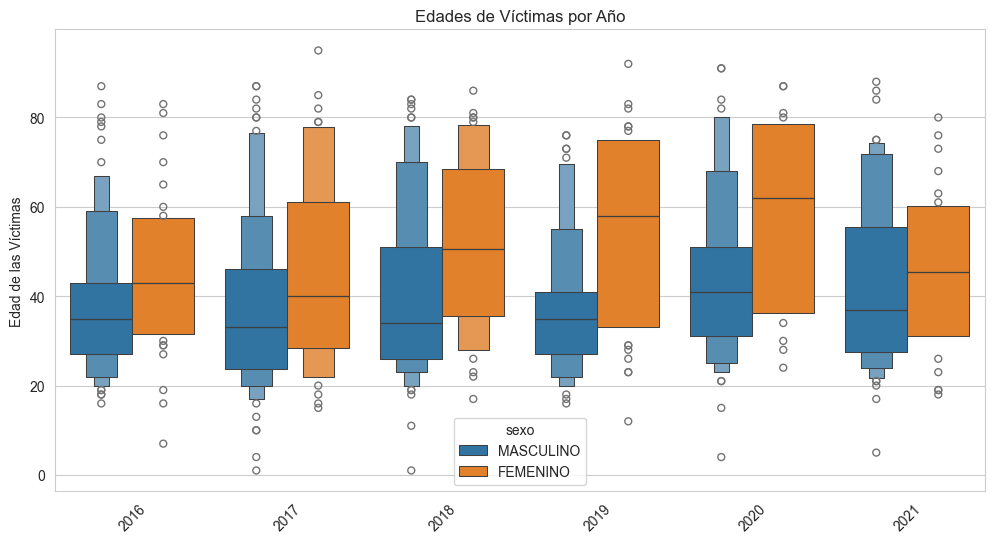

In [82]:
#Se crea el gráfico de boxplot
mask_not_sd = data['sexo']!= 'SD'

plt.figure(figsize=(12, 6))
sns.boxenplot(x='anho_x', y='edad', data=data[mask_not_sd], hue ='sexo')

plt.title('Edades de Víctimas por Año')
plt.xlabel('')
plt.ylabel('Edad de las Víctimas')
# Cambia el formato de las etiquetas del eje x a enteros
plt.xticks(rotation=45)
# Se muestra el gráfico
plt.show()

## Analisis de la población de caba

In [90]:
info_comuna = pd.read_csv('../data/clear/info_comuna.csv',usecols=['COMUNAS','BARRIOS','AREA'])

In [91]:
info_comuna

,COMUNAS,BARRIOS,AREA
0,2,RECOLETA,6.317265e+06
1,6,CABALLITO,6.851029e+06
2,10,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,1.265656e+07
3,11,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL. ...,1.412004e+07
4,12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,1.557093e+07
5,14,PALERMO,1.584587e+07
6,15,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERNAL...,1.432290e+07
7,13,BELGRANO - COLEGIALES - NUÑEZ,1.471321e+07
8,4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,2.168464e+07
9,5,ALMAGRO - BOEDO,6.660603e+06


In [93]:
data = data.merge(info_comuna, left_on='comuna', right_on='COMUNAS' )

## Analisis de victimas por barrios y genero

## Densidad de victimas por barrio y genero